In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt


In [3]:
data = pd.read_pickle('imputed_data_forest_2.pkl')

# print(list(data.columns))
data.head()

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,2019.0,1.0,11.19,-0.95,254.0,7.0,5.56,10.000,2.0,1.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019.0,1.0,11.19,-0.95,346.0,10.0,8.02,6.940,1.2,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019.0,1.0,11.19,-0.99,324.0,6.0,4.69,2.000,0.8,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,1.0,11.19,-0.99,326.0,6.0,4.46,6.532,0.8,5.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,1.0,11.22,-1.02,308.0,8.0,6.52,10.000,4.0,2.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X = data.drop(['Food_InsecurityLevel','YEAR', 'currency_conversion_factor'],axis=1)
y = data['Food_InsecurityLevel']
print(y)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

# fs_ = SelectKBest(score_func=mutual_info_classif, k=70)
# fs_.fit(X_new, y)
# mi_support = fs_.get_support()
# X_new = fs_.transform(X_new)

print(X_new.shape)
print(y.shape)

0        3
1        4
2        4
3        2
4        4
        ..
35721    1
35722    1
35723    1
35724    1
35725    1
Name: Food_InsecurityLevel, Length: 35726, dtype: int32
(35726, 95)
(35726,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=2)
# X_train = X_train[:2]
# X_test = X_test[:2]
# y_train = y_train[:2]
# y_test = y_test[:2]

In [101]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
modelXG = OneVsRestClassifier(XGBClassifier(base_score = 0.8, booster='gbtree', max_depth = 16))
# modelXG = XGBClassifier(base_score = 0.8, booster='gbtree', max_depth=16)
modelXG.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.8, booster='gbtree',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=16,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                     

In [102]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = modelXG.predict(X_test)

# predictions = [round(value) for value in y_pred]
# evaluate predictions
# y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

              precision    recall  f1-score   support

           1       0.76      0.83      0.80      2855
           2       0.67      0.45      0.54      1484
           3       0.65      0.64      0.65      2321
           4       0.71      0.80      0.75      2272

    accuracy                           0.71      8932
   macro avg       0.70      0.68      0.68      8932
weighted avg       0.71      0.71      0.70      8932

Accuracy: 71.03%


Confusion matrix, without normalization
[[2378  143  157  177]
 [ 382  666  319  117]
 [ 239  153 1487  442]
 [ 117   27  315 1813]]


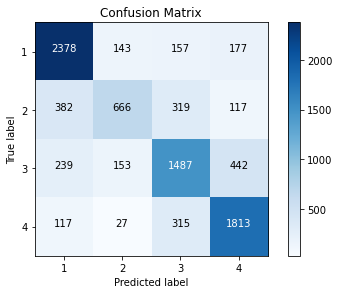

In [103]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
labels=['1', '2', '3', '4']

plot_confusion_matrix(cm=cm, classes=labels, title='Confusion Matrix')
plt.savefig('XGBoost.png',format='png',bbox_inches = "tight")